<a href="https://colab.research.google.com/github/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/Affine/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/mntDrive')

Mounted at /mntDrive


In [2]:
p = input('please enter angle of rotate as radiane for instance (')

please enter angle of rotate as radiane for instance (0.523


--2020-12-13 13:46:37--  https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg
Resolving i.pinimg.com (i.pinimg.com)... 199.232.76.84, 2600:1407:d800:1aa::1931, 2600:1407:d800:194::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|199.232.76.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142536 (139K) [image/jpeg]
Saving to: ‘AMOL_IRAN.jpg’

AMOL_IRAN.jpg       100%[===================>] 139.20K  --.-KB/s    in 0.02s   

2020-12-13 13:46:37 (5.79 MB/s) - ‘AMOL_IRAN.jpg’ saved [142536/142536]

200 200


ValueError: ignored

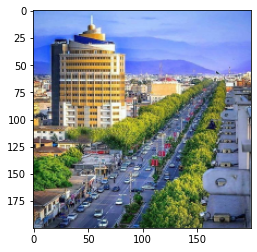

In [29]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def solve_affine(p):
    #p=np.matrix([[np.cos(p),-np.sin(p)],[np.sin(p),np.cos(p)]])
    p=np.matrix([[np.cos(p),np.sin(p),5],[-np.sin(p),np.cos(p),65],[0,0,1]])
    return p
q=np.matrix([[0.7,0,0],[0,0.7,0],[0,0,1]])
p=solve_affine(0.523)

!wget "https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg" -O AMOL_IRAN.jpg


#img = cv.imread('/mntDrive/My Drive/429716936_89294.jpg')
img = cv.imread('AMOL_IRAN.jpg')
img = cv.resize(img, (200,200), interpolation = cv.INTER_AREA)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = np.array(img)

plt.imshow(img)

m=img.shape[0]
n=img.shape[1]
print(m,n)

out3 = np.zeros([m,n])
#out3=[[0 for _ in range(m)]
#      for _ in range(n)]

for i in range(0,m):
  for j in range(0,n):
    l = np.array([i,j,1])
    outy=np.dot(p,q)
    out = np.dot(outy,l)

    if m > out[0,0] > 0.0 and n > out[0,1] > 0.0 :
       x = int(round(out[0,0]))
       y = int(round(out[0,1]))
       if x < m or y < n :
        out3[x][y] = img[i][j]

--2020-12-13 13:46:45--  https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg
Resolving i.pinimg.com (i.pinimg.com)... 199.232.4.84, 2a04:4e42:5f::84
Connecting to i.pinimg.com (i.pinimg.com)|199.232.4.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142536 (139K) [image/jpeg]
Saving to: ‘AMOL_IRAN.jpg’

AMOL_IRAN.jpg       100%[===================>] 139.20K  --.-KB/s    in 0.05s   

2020-12-13 13:46:46 (2.56 MB/s) - ‘AMOL_IRAN.jpg’ saved [142536/142536]



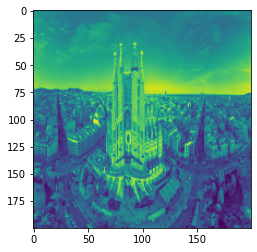

In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

q=np.array([[0.75,0,0],[0,0.75,0],[0,0,1]])
def solve_affine(p):
    p=np.matrix([[np.cos(p),np.sin(p),5],[-np.sin(p),np.cos(p),65],[0,0,1]])
    return p

p=solve_affine(0.523)
# 1.04_1.57_1.89

!wget "https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg" -O AMOL_IRAN.jpg

img = cv.imread('/mntDrive/My Drive/429716936_89294.jpg')
img = cv.resize(img, (200,200), interpolation = cv.INTER_AREA)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img = np.array(img)

plt.imshow(img)

m=img.shape[0]
n=img.shape[1]

out3 = np.zeros([m,n])

#out3=[[0 for _ in range(m)]
#      for _ in range(n)]

for i in range(0,m):
  for j in range(0,n):
    l = np.array([i,j,1])
    #out = np.dot(p,(q,l))
    outy=np.dot(p,q)
    out = np.dot(outy,l)

    if m-1 > out[0,0] > 0 and n-1 > out[0,1] > 0 :
       x = int(round(out[0,0]))
       y = int(round(out[0,1]))
       if x < m or y < n :
         out3[[x],[y]] = img[[i],[j]]

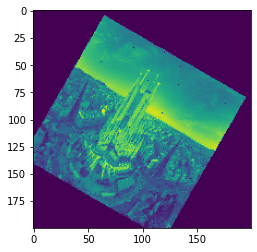

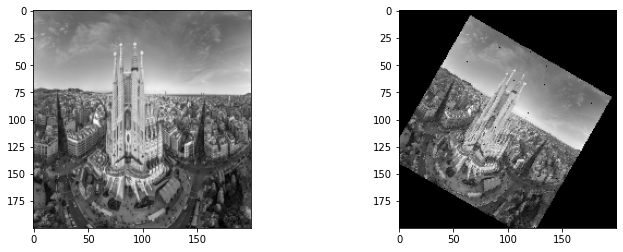

In [27]:
plt.imshow(out3)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.imshow(img, cmap='gray')
ax2.imshow(out3, cmap='gray')
plt.show()